# Importing Libraries and Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
datasetFile = '/content/drive/My Drive/ML_Project_ AQI/city_day.csv'

In [ ]:
df = pd.read_csv(datasetFile, parse_dates = ['Date'])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df1 = df 
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# General Information about the dataset

In [ ]:
# no. of rows and columns
df.shape

(29531, 16)

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [ ]:
print('Date starts from {}, and ends in {}'.format(df['Date'].min().strftime('%Y-%m-%d'), df['Date'].max().strftime('%Y-%m-%d')))


Date starts from 2015-01-01, and ends in 2020-07-01


In [ ]:
# Names of all the cities in the dataset
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

# DATA PREPROCESSING

# Handling the Missing Values 

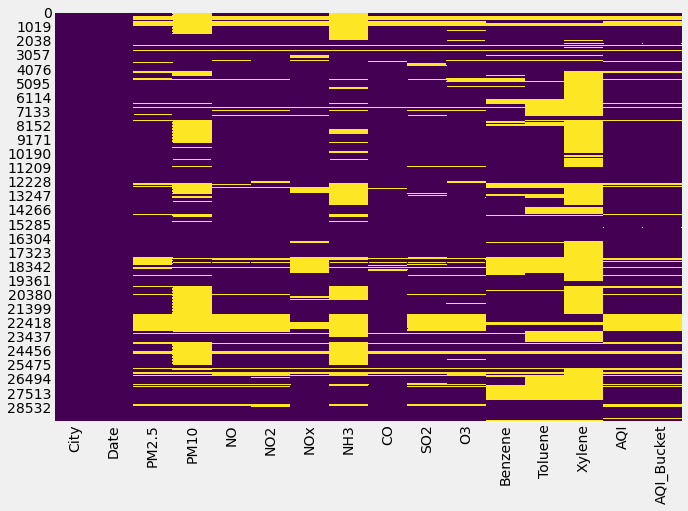

In [ ]:
# heatmap implemented through seaborn library
# Missing values in each column/attribute are shown in yellow color
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cbar = False, cmap='viridis')

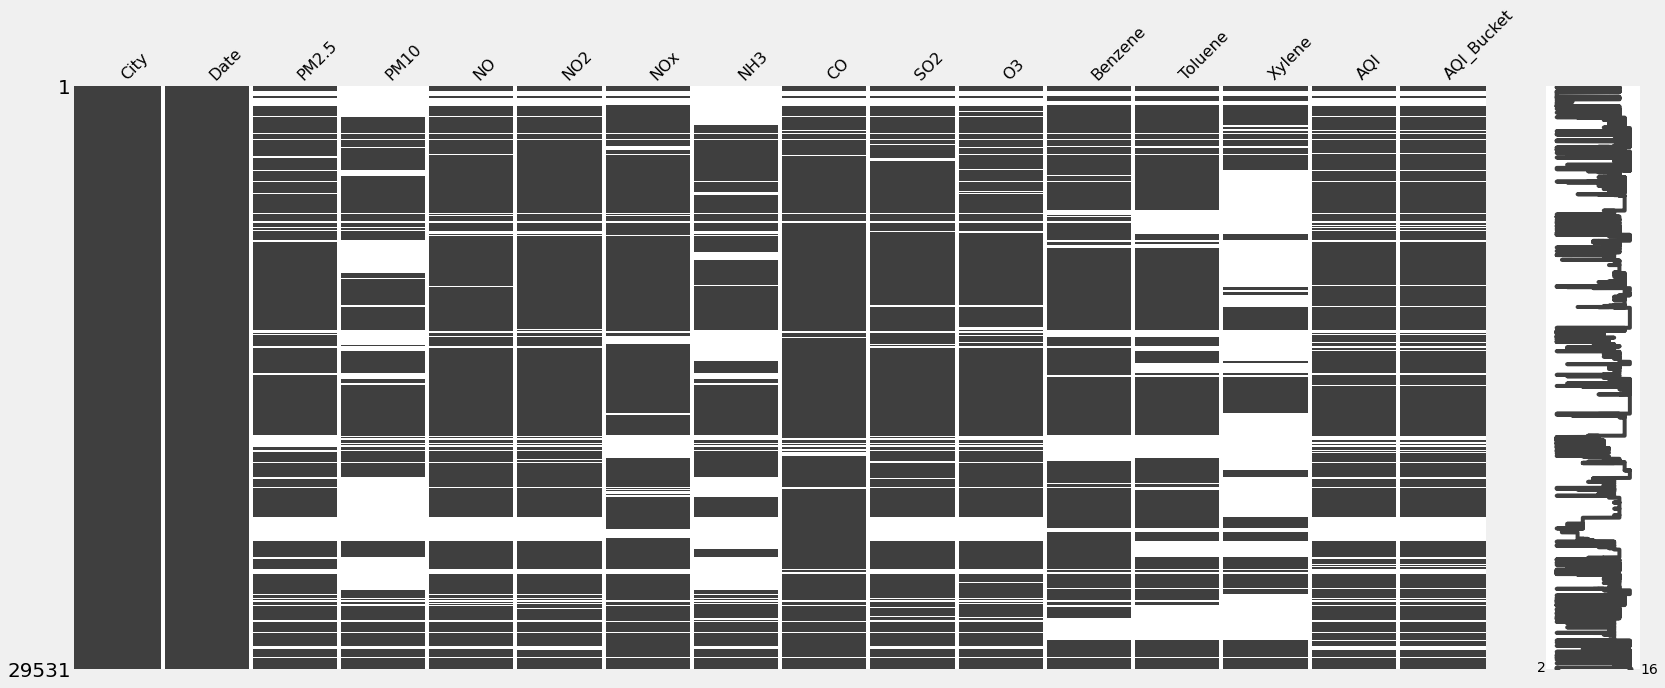

In [ ]:
# Missingno is a Python library that provides the ability to understand the distribution of missing values through informative
# visualizations.
from missingno import matrix
matrix(df)

In [ ]:
# DataFrame.isnull().sum() is the method to get missing values in numbers of perticular dataframe. !!!
# Total number of missing values in each column
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
# Replcaing the missing values through linear inter-polation method
df.interpolate(limit_direction="both",inplace=True)
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [ ]:
# grouping the dataframe according to the cities
dfcopy = df.groupby(['City'])

# creating the list of all the names of the cities in the dataset
city_names = df['City'].unique()
city_names = city_names.tolist()

In [ ]:
# Since the AQI_Bucket has categorical values, so we'll replace them by frequency count method w.r.t each city
# A city having maximum count of AQI_Bucket value will be inserted for the NaN values for that city in AQI_Bucket.
# For eg--> suppose Ahmedabad has maximum count of say 'Severe', for the city Ahmedabad, NaN values for AQI_Bucket will be
#           replaced with 'Severe'.

for city in city_names:
    x = dfcopy['AQI_Bucket'].value_counts().loc[city].index[0]  # index 0 because the values will be ordered in descending order
    filt = df['City'] == city
    index = df[filt].index

    df.loc[index[0]:index[len(index)-1], 'AQI_Bucket'].fillna(x, inplace = True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Severe
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Severe
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Severe
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Severe
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
# Now AQI_Bucket has 0 null values
df['AQI_Bucket'].isnull().sum()

0

# Importing Libraries for ML Model

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Creating Dependent & Independent Features

In [ ]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["AQI_Bucket","City","Date","AQ_acceptability","Month","Day"]]
# Store the variable we are predicting 
target = "AQI_Bucket"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(29531, 13)
(29531,)


# NORMAL TEST/TRAIN SPLIT ( 75 TRAIN - 25 TEST) RATIO

In [ ]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75)

# Over-Sampling

In [ ]:
os = RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_res.shape,y_train_res.shape

((49038, 13), (49038,))

# Hyper-Tuning GridSearchcv 

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# criterion
criterion = ['gini','entropy']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
              }
print(random_grid)


{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'criterion': ['gini', 'entropy']}


In [ ]:
# from sklearn.model_selection import GridSearchCV
# randfor = RandomForestClassifier()
# rf_gscv = GridSearchCV(randfor, random_grid, cv=10, verbose=3)
# best_model = rf_gscv.fit(X_train_res, y_train_res)
# print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
# print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
# print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
# print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randforest = RandomForestClassifier()
rf_gscv1 = RandomizedSearchCV(randforest, random_grid, cv=10)
best_model1 = rf_gscv1.fit(X_train_res, y_train_res)
print('Best n_estimators:', best_model1.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model1.best_estimator_.get_params()['max_features'])
print('Best max_depth:', best_model1.best_estimator_.get_params()['max_depth'])
print('Best criterion:', best_model1.best_estimator_.get_params()['criterion'])

Best n_estimators: 336
Best max_features: sqrt
Best max_depth: 50
Best criterion: entropy


In [ ]:
best_model1.best_score_

0.9920673546408814

In [ ]:
best_model1.cv_results_

{'mean_fit_time': array([49.56975706, 17.42453587, 44.90542285,  6.00458057, 73.3446974 ,
        57.2879164 , 65.24509735, 72.97505295, 25.28842189,  1.51429317]),
 'mean_score_time': array([0.27960098, 0.10167243, 0.25160697, 0.05917199, 0.41749632,
        0.32954643, 0.3699235 , 0.42230396, 0.14557395, 0.01303103]),
 'mean_test_score': array([0.99206735, 0.99204698, 0.98641868, 0.99176149, 0.99200618,
        0.99200617, 0.99204697, 0.99204696, 0.9919654 , 0.99117013]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', 'gini', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[50, 100, 10, 50, 110, 100, 110, 100, 20, None],
              mask=[False, False, False, False, False, False, False, False,
                    False, F

No handles with labels found to put in legend.


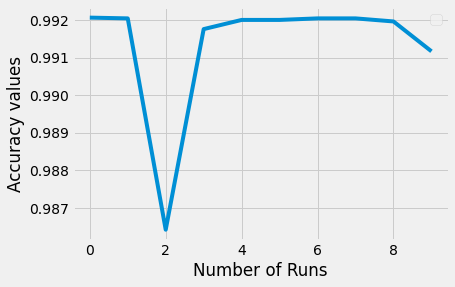

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
scores = best_model1.cv_results_['mean_test_score']

x_vals = np.arange(0,len(scores))

plt.plot(x_vals,scores)
plt.legend()
plt.xlabel('Number of Runs')
plt.ylabel('Accuracy values')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
randfor = RandomForestClassifier()
rf_gscv = GridSearchCV(randfor, random_grid, cv=10)
best_model = rf_gscv.fit(X_train_res, y_train_res)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])

NameError: ignored